## <center>Курсовой проект по курсу "Теория вероятностей и математическая статистика"<a class="anchor" id="course_project"></a><center>

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Тема курсового проекта:**

Линейная регрессия 

**Задачи в рамках выполнения проекта**:

1. условия применимости метода проверить,можно с графиками
2. построить модель
3. исследовать на статистическую значимость модель, можно и коэффициенты (самостоятельное изучение)
4. коэффициент детерминации

**Наименование файлов с данными**

"Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

**Целевая переменная**

Price - цена недвижимости в Бостоне.

### 1. Первичное изучение данных<a class="anchor" id="course_project_review"></a>

In [318]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import probplot
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [216]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [217]:
#Подробная информация о данных
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [218]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [219]:
X.shape

(506, 13)

In [220]:
#нет пропусков
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [221]:
#смотрим первую строку
X.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [222]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [223]:
# Целевая переменная
y = pd.DataFrame(boston["target"], columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [224]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [225]:
y.tail()

,price
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


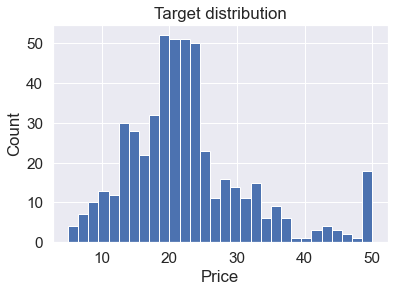

In [226]:
y.hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [227]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
price,506.0,22.532806,9.197104,5.0,17.025,21.2,25.0,50.0


In [228]:
#Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка
#распределение не является нормальным, так как pvalue=4.940618243974614e-16 < 0.05

shapiro(y)

ShapiroResult(statistic=0.91717529296875, pvalue=4.940618243974614e-16)

In [229]:
#Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка
#распределение не является нормальным, так как pvalue=1.935782165674027e-07 < 0.05

shapiro(np.log(y))

ShapiroResult(statistic=0.9757390022277832, pvalue=1.935782165674027e-07)

In [230]:
y.quantile(.95), y.quantile(.025)

(price    43.4
 Name: 0.95, dtype: float64,
 price    8.3
 Name: 0.025, dtype: float64)

price    43.4
Name: 0.95, dtype: float64 price    8.3
Name: 0.025, dtype: float64


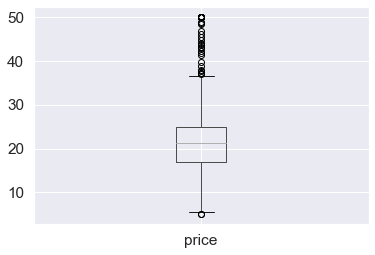

In [231]:
y.boxplot(column='price')
print(y.quantile(.95), y.quantile(.025))

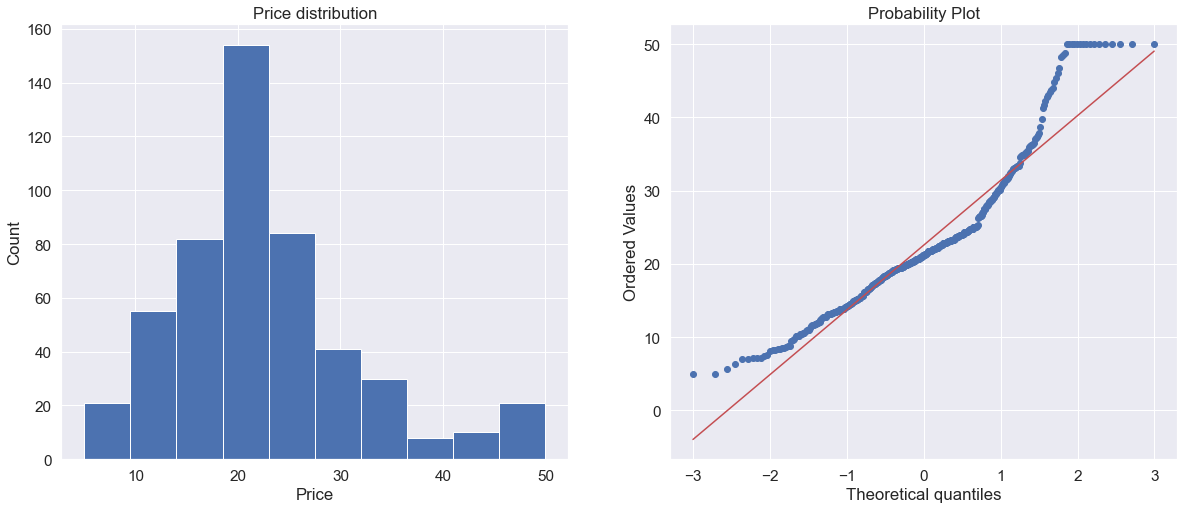

In [232]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')
ax1.set_title('Price distribution')
y['price'].hist()

plt.subplot(122)
probplot(y['price'], dist='norm', plot=plt)

plt.show()

In [233]:
"""Функция для расчета и изображения на графике медианы и среднего значения заданного показателя"""
def f_plot_distribution(feature, bins_val=50):
    feature_mean = round(y[feature].mean(), 2)
    feature_median = y[feature].median()

    plt.figure(figsize = (12, 6))

    sns.distplot(y[feature], bins=bins_val)

    x = np.linspace(0, 0.05, 10)
    plt.plot([feature_mean] * 10, x, label='mean',  linewidth=4)
    plt.plot([feature_median] * 10, x, label='median',  linewidth=4)

    plt.title('Distribution of ' + feature)
    plt.legend(loc='upper left')
    plt.show()
    print(f"\tMean= {feature_mean}    Median= {feature_median}")
    return

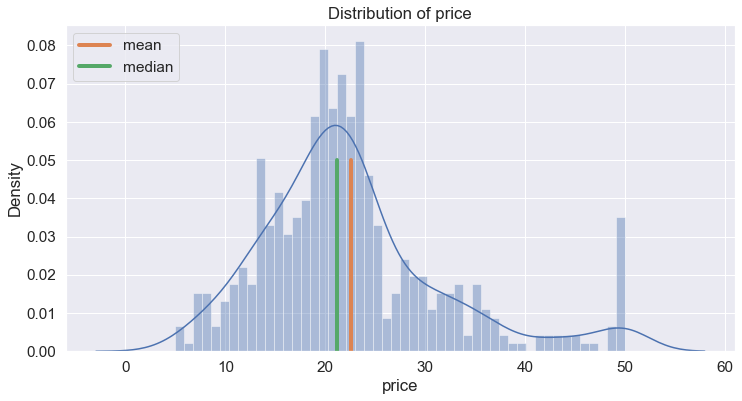

	Mean= 22.53    Median= 21.2


In [234]:
#то, что среднее близко лежит на графике с медианой означает, что нет/мало выбросов
f_plot_distribution('price')

In [235]:
full_df = X
full_df['Price'] = y
full_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [236]:
# очистим датасет от данных, которые больше 95 квантиля и меньше 25 квантиля
clean_df = full_df.loc[(full_df['Price'] < 43.4) & (full_df['Price'] > 8.3)]
clean_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [237]:
clean_df.shape

(466, 14)

In [238]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     466 non-null    float64
 1   ZN       466 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     466 non-null    float64
 4   NOX      466 non-null    float64
 5   RM       466 non-null    float64
 6   AGE      466 non-null    float64
 7   DIS      466 non-null    float64
 8   RAD      466 non-null    float64
 9   TAX      466 non-null    float64
 10  PTRATIO  466 non-null    float64
 11  B        466 non-null    float64
 12  LSTAT    466 non-null    float64
 13  Price    466 non-null    float64
dtypes: float64(14)
memory usage: 54.6 KB


In [239]:
#std и среднее значение стали еще ближе друг к другу
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,466.0,3.159561,7.737993,0.00632,0.080602,0.229015,2.897595,88.9762
ZN,466.0,11.115880,22.689998,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,466.0,11.009099,6.739537,0.74000,5.190000,9.125000,18.100000,27.7400
CHAS,466.0,0.060086,0.237901,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,466.0,0.551989,0.116657,0.38500,0.448250,0.532000,0.624000,0.8710
RM,466.0,6.228627,0.606955,3.56100,5.887250,6.183500,6.555000,8.7800
AGE,466.0,67.777897,28.180141,2.90000,43.475000,76.500000,93.475000,100.0000
DIS,466.0,3.896890,2.121356,1.13700,2.167575,3.361800,5.287300,12.1265
RAD,466.0,9.255365,8.564821,1.00000,4.000000,5.000000,8.000000,24.0000
TAX,466.0,403.180258,164.578699,187.00000,281.000000,330.000000,666.000000,711.0000


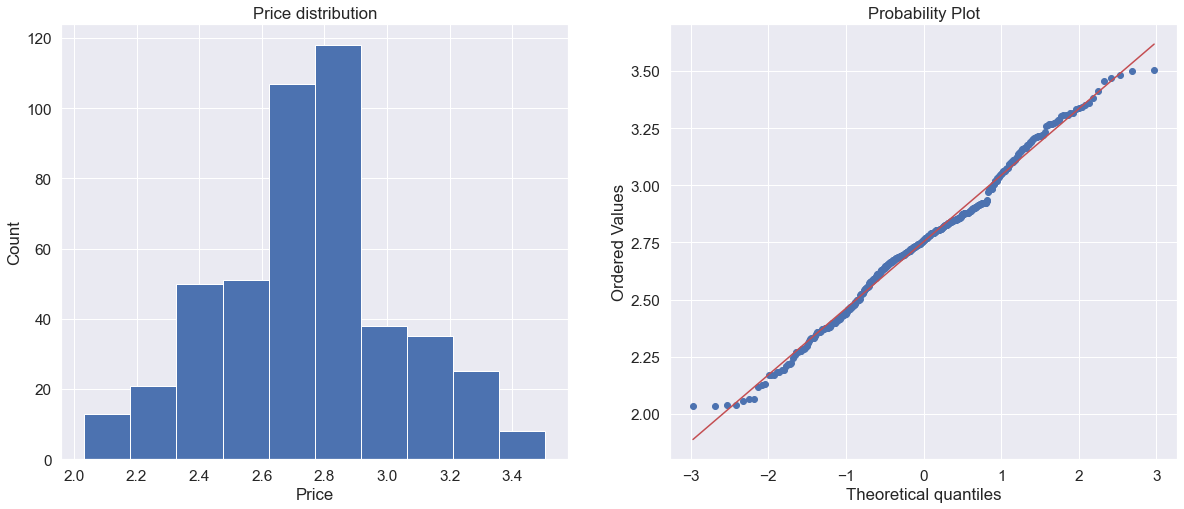

In [240]:
#максимально приближено к нормальному распределению
#использовала трансформацию через кубический корень
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')
ax1.set_title('Price distribution')
np.cbrt(clean_df['Price']).hist()

plt.subplot(122)
probplot(np.cbrt(clean_df['Price']), dist='norm', plot=plt)

plt.show()

In [241]:
shapiro(np.cbrt(clean_df['Price']))

ShapiroResult(statistic=0.9909756183624268, pvalue=0.00605402048677206)

In [242]:
"""Функция для расчета и изображения на графике медианы и среднего значения заданного показателя"""
def f_plot_distribution(feature, bins_val=50):
    feature_mean = round(clean_df[feature].mean(), 2)
    feature_median = clean_df[feature].median()

    plt.figure(figsize = (12, 6))

    sns.distplot(clean_df[feature], bins=bins_val)

    x = np.linspace(0, 0.05, 10)
    plt.plot([feature_mean] * 10, x, label='mean',  linewidth=4)
    plt.plot([feature_median] * 10, x, label='median',  linewidth=4)

    plt.title('Distribution of ' + feature)
    plt.legend(loc='upper left')
    plt.show()
    print(f"\tMean= {feature_mean}    Median= {feature_median}")
    return

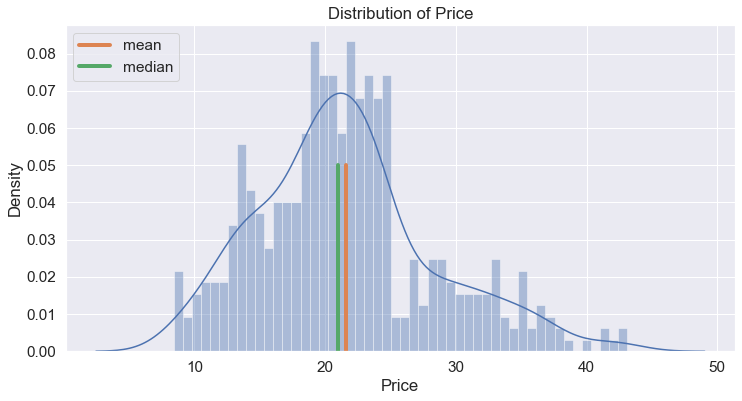

	Mean= 21.56    Median= 21.0


In [243]:
#график стал более гладким, среднее и медиана еще ближе друг с другу
f_plot_distribution('Price')

### 2. Проверка условий применимости линейной регрессии <a class="anchor" id="course_project_review"></a>

**В рамках данной работы мы будем работать с исходным датасетом full_df и датасетом clean_df,** 

**который мы максимально приблизили к нормальному распределению, и посмотрим, какие это даст результаты,**

**и как повлияет на модель линейной регрессии.**

**Условия применимости линейной регрессии:**

1. Наличие линейной зависимости между независимой переменной x и зависимой y
2. Независимость остатков
3. Для любого значения x значение зависимой переменной y распределено нормально (нормальное распределение остатков)
4. Гомоскедастичность

**1. Наличие линейной зависимости между независимой переменной x и зависимой y**

In [244]:
full_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [245]:
clean_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


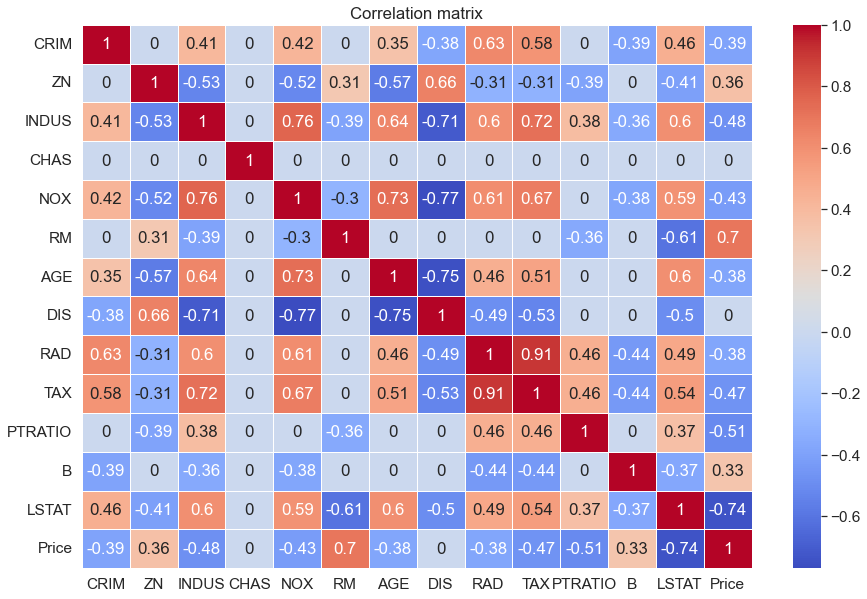

In [246]:
# Попробуем построить матрицу корреляций для full_df. 
# у целевой переменной 'Price' есть заметная корреляция с LSTAT, TAX, PTRATIO, RM, INDUS, NOX

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = full_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

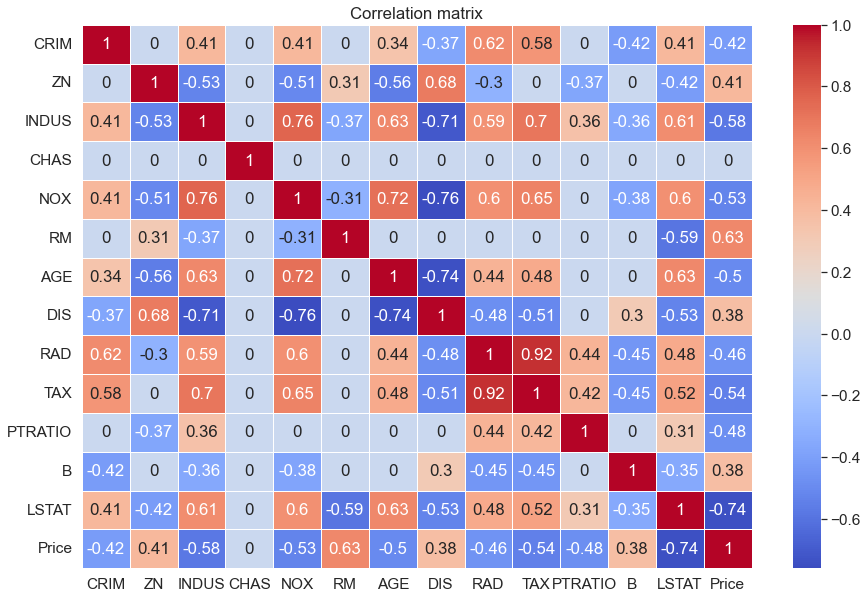

In [247]:
# Попробуем построить матрицу корреляций у очищенного датасета clean_df. 
# у целевой переменной 'Price' есть заметная корреляция с LSTAT, TAX, PTRATIO, RM, INDUS, NOX

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = clean_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Вывод: найдена заметная линейная зависимость у 6 признаков (LSTAT, TAX, PTRATIO, RM, INDUS, NOX) у изначального датасета и 10 признаков для очищенного (с корреляцией больше 0.4)**

**2-4. Независимость остатков, Нормальное распределение остатков, Гомоскедастичность**

**Остатки регрессии** - это разности между наблюдаемыми значениями и значениями, предсказанными изучаемой регрессионной моделью. - наблюдаемое значение; - соответствующее предсказанное значение.

То есть получается, чтобы проверить данные параметры, касающиеся остатков, нужно сначала построить модель линейной регрессии, найти остатки и сравнить их с фактическими значениями. Поэтому этот параметр мы изучим позже.

### 3. Построение модели линейной регрессии<a class="anchor" id="course_project_review"></a>

In [248]:
#исходный датасет full_df
#матричный метод

In [249]:
#506 rows x 14 columns
full_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   

In [250]:
#удалим столбец CHAS, так как с ним нет корреляции (=0) и целевую переменную
df = full_df.drop(['CHAS', 'Price'], axis=1)
df.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [251]:
#[506 rows x 12 columns]>
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

          B  LSTAT  
0    396.9

In [252]:
#преобразуем в numpy.array
X  = df.to_numpy()

In [253]:
#вроде правильно все преобразовалось:)
X[:5, 2]

array([2.31, 7.07, 7.07, 2.18, 2.18])

Используем матричный метод:
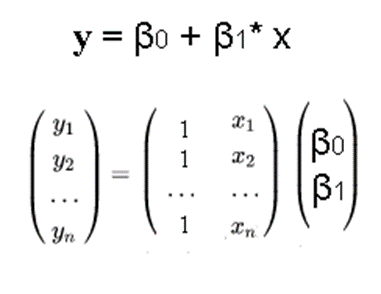
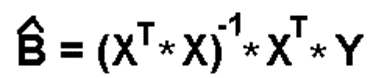

In [254]:
#добавляем единицы, чтобы посчитать с интерсептом
X = np.hstack([np.ones((506,1)),X])
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [255]:
X[:5, 0]

array([1., 1., 1., 1., 1.])

In [256]:
X[:5, 1]

array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905])

In [257]:
y = full_df['Price'].to_numpy()
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [258]:
y.shape

(506,)

In [259]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([ 3.68919598e+01, -1.13139078e-01,  4.70524578e-02,  4.03114536e-02,
       -1.73669994e+01,  3.85049169e+00,  2.78375651e-03, -1.48537390e+00,
        3.28311011e-01, -1.37558288e-02, -9.90958031e-01,  9.74145094e-03,
       -5.34157620e-01])

In [260]:
X  = df.to_numpy()
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [261]:
# array([ 3.68919598e+01, -1.13139078e-01,  4.70524578e-02,  4.03114536e-02,
#        -1.73669994e+01,  3.85049169e+00,  2.78375651e-03, -1.48537390e+00,
#         3.28311011e-01, -1.37558288e-02, -9.90958031e-01,  9.74145094e-03,
#        -5.34157620e-01])

#0 CRIM	1 ZN	 2 INDUS	 3 NOX	4 RM	5 AGE	6  DIS	7  RAD	 8 TAX	9 PTRATIO	10 B	11 LSTAT
y_hat = 3.68919598e+01 + (-1.13139078e-01 * X[:, 0]) + (4.70524578e-02 * X[:, 1]) + (4.03114536e-02 * X[:, 2]) + \
(-1.73669994e+01 * X[:, 3]) + (3.85049169e+00 * X[:, 4]) + (2.78375651e-03 * X[:, 5]) + (-1.48537390e+00 * X[:, 6]) + \
(3.28311011e-01 * X[:, 7]) + (-1.37558288e-02 * X[:, 8]) + (-9.90958031e-01 * X[:, 9]) + (9.74145094e-03 * X[:, 10]) + \
(-5.34157620e-01 * X[:, 11])
y_hat

array([30.21237206, 25.26723379, 30.84935857, 28.76476321, 28.10319647,
       25.39637356, 23.27727158, 19.81293472, 11.67939108, 19.17751573,
       19.26260757, 21.88220933, 21.08728688, 19.62593836, 19.38628107,
       19.3542985 , 20.54334701, 16.96673011, 16.1077429 , 18.46375623,
       12.53447764, 17.75347645, 15.88205299, 13.84762447, 15.74364197,
       13.37917045, 15.52096051, 14.71909914, 19.6659959 , 20.99280616,
       11.43763547, 18.16507014,  8.67610496, 14.31028075, 13.68603059,
       23.97536144, 22.4597876 , 23.21326486, 22.98654921, 31.46601829,
       34.35033379, 28.16470975, 25.32126796, 24.71804534, 23.09221844,
       22.22159437, 20.51415603, 18.19511698,  9.14698721, 17.3204729 ,
       21.42997962, 24.20037006, 27.85266453, 24.19602971, 14.97692602,
       31.31317634, 24.82026783, 33.37730274, 21.86442939, 21.19218707,
       17.97119272, 18.66017674, 24.17974695, 22.67371073, 23.47507732,
       30.41945064, 25.54351989, 21.02731649, 17.30913653, 20.71

In [262]:
mse = ((y - y_hat) ** 2).sum() / 506
mse

22.327578923191638

In [263]:
"""Функция для оценки предсказаний"""
def evaluate_preds(test_true_values, test_pred_values):
    print('Test R2:\t' + str(round(r2(test_true_values, test_pred_values), 3)))   
    
    plt.figure(figsize=(18,10))
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Price prediction results')

    plt.show()

Test R2:	0.736


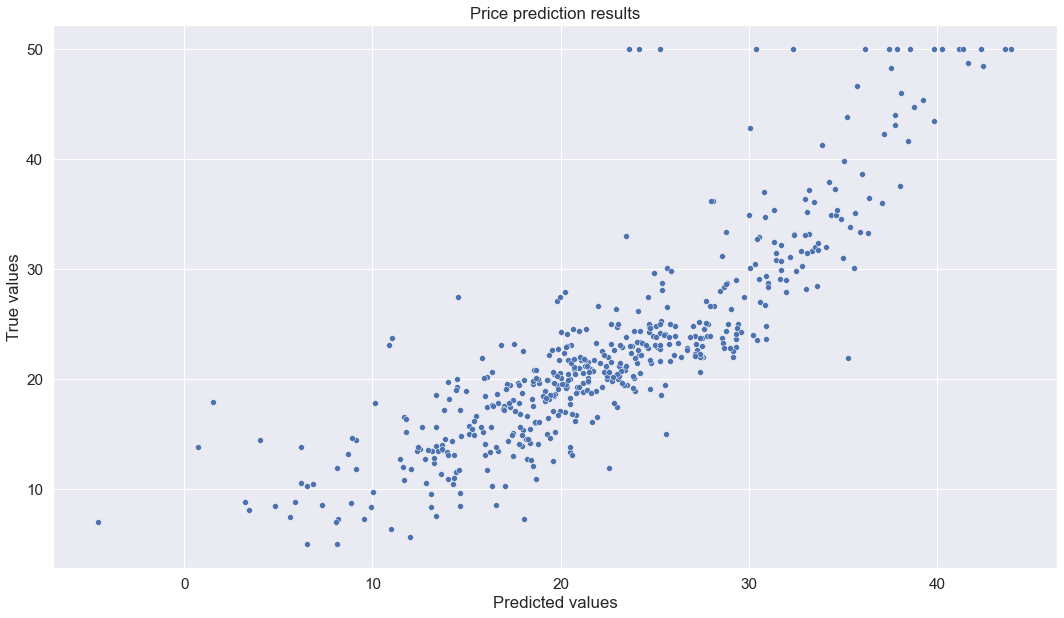

In [264]:
#не так уж и плохо:)
#Test R2:	0.736
evaluate_preds(y, y_hat)

In [265]:
#коэффициент детерминации
r_2 = np.corrcoef(y, y_hat) ** 2 
r_2[0,1]

0.7355165089722998

**Вернемся к изучению критериев регрессии:**

**2-4. Независимость остатков, Нормальное распределение остатков, Гомоскедастичность**

In [266]:
y_res = y - y_hat
y_res

array([-6.21237206e+00, -3.66723379e+00,  3.85064143e+00,  4.63523679e+00,
        8.09680353e+00,  3.30362644e+00, -3.77271583e-01,  7.28706528e+00,
        4.82060892e+00, -2.77515731e-01, -4.26260757e+00, -2.98220933e+00,
        6.12713122e-01,  7.74061640e-01, -1.18628107e+00,  5.45701504e-01,
        2.55665299e+00,  5.33269892e-01,  4.09225710e+00, -2.63756230e-01,
        1.06552236e+00,  1.84652355e+00, -6.82052988e-01,  6.52375534e-01,
       -1.43641974e-01,  5.20829546e-01,  1.07903949e+00,  8.09008634e-02,
       -1.26599590e+00,  7.19383864e-03,  1.26236453e+00, -3.66507014e+00,
        4.52389504e+00, -1.21028075e+00, -1.86030590e-01, -5.07536144e+00,
       -2.45978760e+00, -2.21326486e+00,  1.71345079e+00, -6.66018288e-01,
        5.49666208e-01, -1.56470975e+00, -2.12679601e-02, -1.80453418e-02,
       -1.89221844e+00, -2.92159437e+00, -5.14156030e-01, -1.59511698e+00,
        5.25301279e+00,  2.07952710e+00, -1.72997962e+00, -3.70037006e+00,
       -2.85266453e+00, -

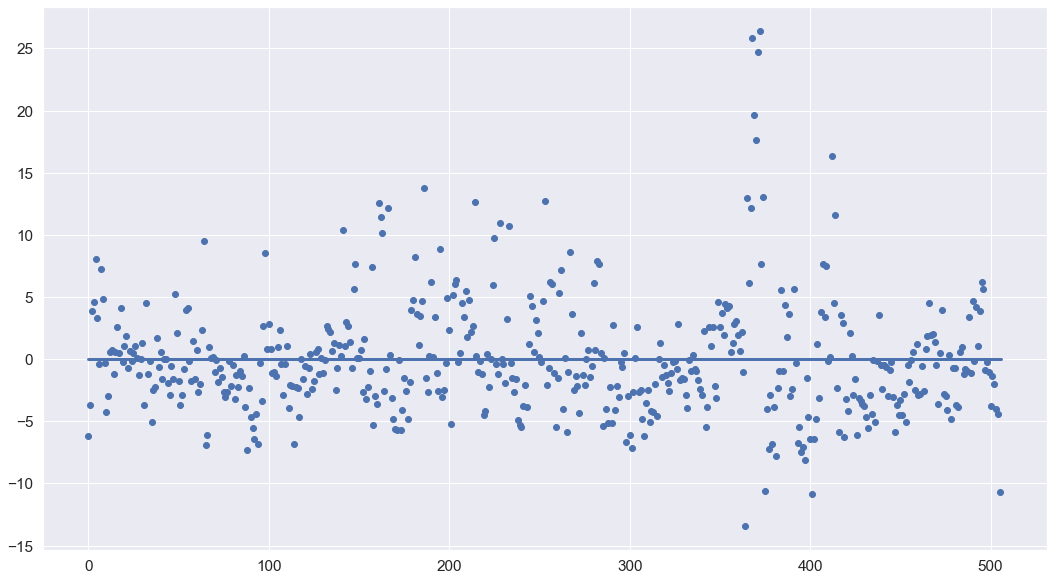

In [267]:
plt.figure(figsize=(18,10))
plt.scatter(np.arange(506), y_res)
plt.plot([0, 506], [0, 0], linewidth=3)
plt.show()

**По графику выше наблюдается независимость остатков (не видно какого-то шаблона в поведении остатков с течением времени) и гомоскедатичность (разброс остатков вцелом равномерный)**

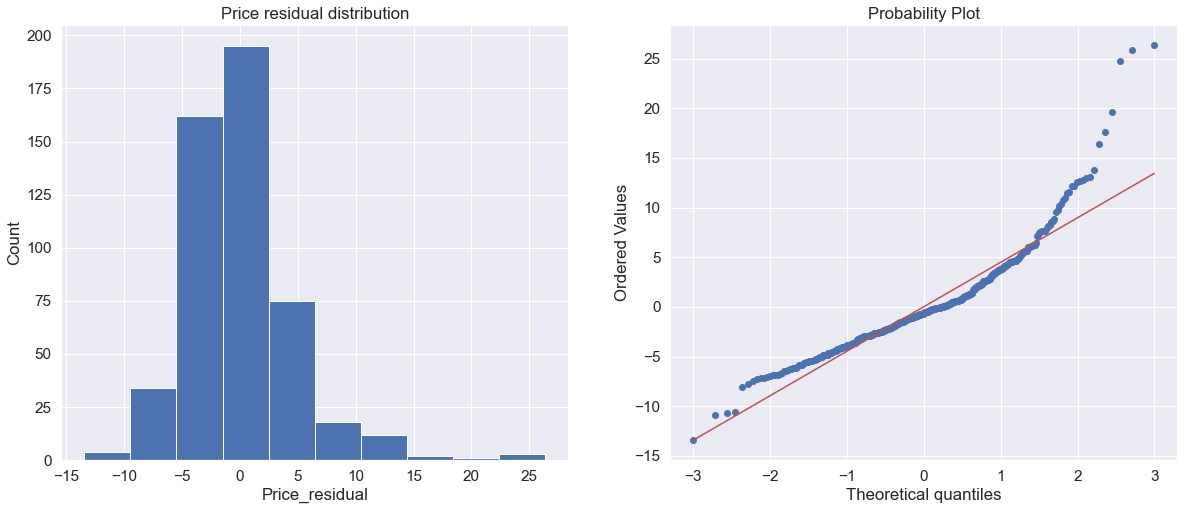

In [268]:
#проверим нормальность распределения остатков
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Price_residual')
ax1.set_ylabel('Count')
ax1.set_title('Price residual distribution')
pd.DataFrame(y_res)[0].hist()

plt.subplot(122)
probplot(pd.DataFrame(y_res)[0], dist='norm', plot=plt)

plt.show()

In [269]:
shapiro(y_res)

ShapiroResult(statistic=0.8952972888946533, pvalue=4.270262836842739e-18)

**Распределение остатков не является нормальным. Получается, этот критерий не выполняется у данной модели**
**Возможно, это связано с тем, что изначально сама величина Price не была распределена нормально**

In [270]:
#построим модель линейной регрессии для clean_df, который мы максимально приблизили к нормальному распределению.
#матричный метод
#466 rows x 14 columns
clean_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   

In [271]:
#удалим столбец CHAS, так как с ним нет корреляции (=0) и целевую переменную
df_clean = clean_df.drop(['CHAS', 'Price'], axis=1)
df_clean.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [272]:
#[466 rows x 12 columns]>
df_clean.info

<bound method DataFrame.info of         CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
..       ...   ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  1.0  273.0     21.0   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  1.0  273.0     21.0   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  1.0  273.0     21.0   

          B  LSTAT  
0    396.9

In [273]:
#преобразуем в numpy.array
X_clean  = df_clean.to_numpy()

In [274]:
#вроде правильно все преобразовалось:)
X_clean[:5, 2]

array([2.31, 7.07, 7.07, 2.18, 2.18])

In [275]:
#добавляем единицы, чтобы посчитать с интерсептом
X_clean = np.hstack([np.ones((466,1)),X_clean])
X_clean

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [276]:
X_clean[:5, 0]

array([1., 1., 1., 1., 1.])

In [277]:
X_clean[:5, 1]

array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905])

In [278]:
y_clean = np.cbrt(clean_df['Price']).to_numpy()
# y_clean = clean_df['Price'].to_numpy()
y_clean

array([2.88449914, 2.7849533 , 3.26169358, 3.22044205, 3.30803064,
       3.06168589, 2.83973945, 3.00369914, 2.54582168, 2.66371201,
       2.46621207, 2.66371201, 2.78924445, 2.73239442, 2.63041211,
       2.70988603, 2.84798257, 2.59624705, 2.72343568, 2.63041211,
       2.38696638, 2.6961995 , 2.47712466, 2.43849948, 2.49866595,
       2.40439011, 2.5509544 , 2.45520205, 2.64001224, 2.75892418,
       2.33310655, 2.43849948, 2.3633315 , 2.35734836, 2.38110158,
       2.66371201, 2.71441762, 2.75892418, 2.91227457, 3.13461041,
       3.26794804, 2.98511142, 2.93566733, 2.91227457, 2.76765501,
       2.68237259, 2.71441762, 2.5509544 , 2.4328808 , 2.68699738,
       2.7007771 , 2.73685184, 2.92401774, 2.86025851, 2.66371201,
       3.28348034, 2.91227457, 3.16151826, 2.85617825, 2.6961995 ,
       2.65428286, 2.5198421 , 2.81050476, 2.92401774, 3.20753433,
       2.86432716, 2.68699738, 2.80203933, 2.59129237, 2.75453796,
       2.89248948, 2.78924445, 2.83559988, 2.86025851, 2.88849

In [279]:
y_clean.shape

(466,)

In [280]:
B_clean = np.dot(np.linalg.inv(np.dot(X_clean.T, X_clean)), X_clean.T @ y_clean)
B_clean 

array([ 3.42466730e+00, -5.94509114e-03,  1.13085554e-03, -1.73148365e-05,
       -5.58604199e-01,  1.01139987e-01, -7.28664330e-04, -4.12943303e-02,
        9.86883412e-03, -5.09355882e-04, -3.20117401e-02,  4.22668176e-04,
       -1.74032274e-02])

In [281]:
X_clean  = df_clean.to_numpy()
X_clean

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [282]:
X_clean[:5, 2]

array([2.31, 7.07, 7.07, 2.18, 2.18])

In [283]:
# 0 CRIM	1 ZN	2 INDUS	3 NOX	4 RM	5 AGE	6 DIS	7 RAD	8 TAX	9 PTRATIO	10 B	11 LSTAT

# array([ 3.31588610e+01, -9.97599731e-02,  3.53779284e-02, -4.13216944e-02,
#        -1.15863518e+01,  3.05272456e+00, -2.08429605e-02, -1.08584202e+00,
#         2.37561174e-01, -1.24304200e-02, -7.58075124e-01,  8.55556806e-03,
#        -3.46787331e-01])

# y_hat_clean = 3.31588610e+01 + (-9.97599731e-02 * X_clean[:, 0]) + (3.53779284e-02 * X_clean[:, 1]) + \
# (-4.13216944e-02 * X_clean[:, 2]) + (-1.15863518e+01 * X_clean[:, 3]) + (3.05272456e+00 * X_clean[:, 4]) + \
# (-2.08429605e-02 * X_clean[:, 5]) + (-1.08584202e+00  * X_clean[:, 6]) + (2.37561174e-01  * X_clean[:, 7]) + \
# (-1.24304200e-02  * X_clean[:, 8]) + (-7.58075124e-01  * X_clean[:, 9]) + (8.55556806e-03  * X_clean[:, 10]) + \
# (-3.46787331e-01  * X_clean[:, 11])

# ([ 3.42466730e+00, -5.94509114e-03,  1.13085554e-03, -1.73148365e-05,
#        -5.58604199e-01,  1.01139987e-01, -7.28664330e-04, -4.12943303e-02,
#         9.86883412e-03, -5.09355882e-04, -3.20117401e-02,  4.22668176e-04,
#        -1.74032274e-02])

y_hat_clean = 3.42466730e+00 + (-5.94509114e-03 * X_clean[:, 0]) + ( 1.13085554e-03 * X_clean[:, 1]) + \
(-1.73148365e-05 * X_clean[:, 2]) + (-5.58604199e-01 * X_clean[:, 3]) + (1.01139987e-01 * X_clean[:, 4]) + \
(-7.28664330e-04 * X_clean[:, 5]) + (-4.12943303e-02  * X_clean[:, 6]) + (9.86883412e-03  * X_clean[:, 7]) + \
(-5.09355882e-04 * X_clean[:, 8]) + (-3.20117401e-02  * X_clean[:, 9]) + (4.22668176e-04  * X_clean[:, 10]) + \
(-1.74032274e-02  * X_clean[:, 11])

y_hat_clean = (y_hat_clean ** 3)

y_hat_clean

array([28.18932161, 24.0017288 , 28.70939478, 27.71383529, 26.84653927,
       24.88827762, 22.67917639, 19.51789576, 14.47491585, 19.4129244 ,
       19.10184242, 21.4073398 , 21.56638992, 20.06540779, 19.33195994,
       19.99185466, 21.27081842, 17.75553393, 17.92633813, 19.0616628 ,
       14.81074658, 18.14230403, 16.77043652, 15.54474982, 16.82245761,
       15.45056519, 16.80083883, 16.02071198, 19.15485366, 20.06741006,
       14.19880639, 18.14884464, 12.48618895, 15.83753636, 15.01291964,
       23.12351535, 22.07906695, 23.19917613, 23.14687983, 29.95720447,
       32.59012314, 27.99711117, 25.80775476, 25.30113107, 23.35179859,
       22.92303524, 21.55236988, 18.86991222, 13.42152827, 18.96472147,
       21.99846141, 23.74631814, 27.49666803, 24.67730686, 16.86248057,
       29.91139927, 24.53160696, 31.46608964, 22.56465013, 21.69338887,
       19.13622637, 18.92150604, 23.35996393, 22.60036446, 23.30672384,
       29.26480975, 25.0019075 , 22.08601518, 19.22146025, 21.61

In [284]:
y_clean = clean_df['Price'].to_numpy()

In [285]:
#10.343928971073492 - гораздо меньше, у первой модели (full_df) было 22.327578923191638
mse_clean = ((y_clean - y_hat_clean) ** 2).sum() / 466
mse_clean

10.343928971073492

Test R2:	0.773


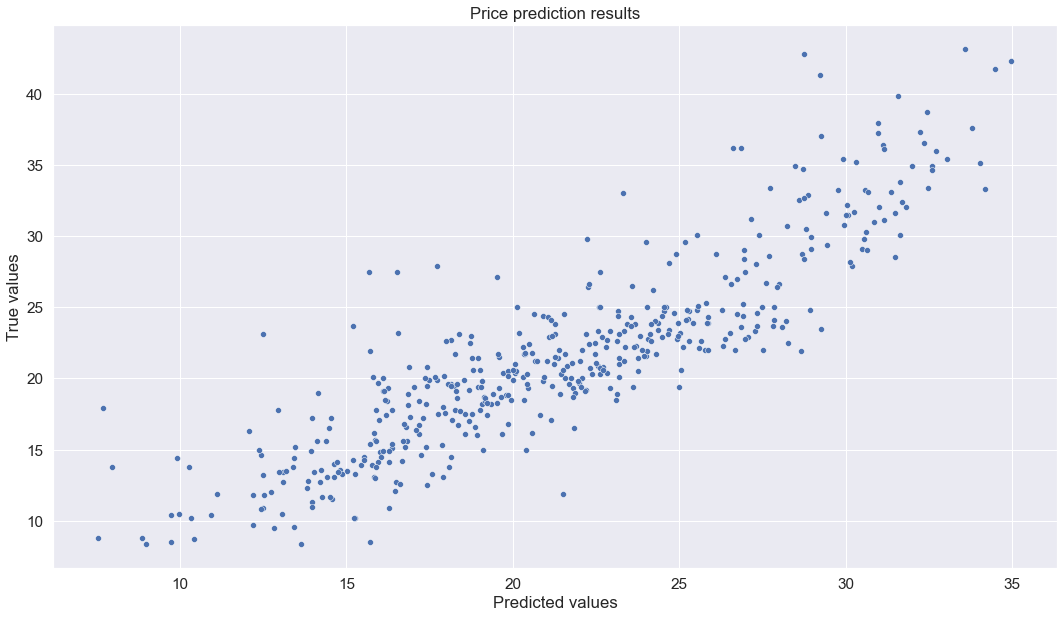

In [286]:
#Уже лучше, был R2 0.736
#Test R2:	0.773
evaluate_preds(y_clean, y_hat_clean)

In [287]:
#коэффициент детерминации
r_2 = np.corrcoef(y_clean, y_hat_clean) ** 2 
r_2[0,1]

0.7748899425631018

**Вернемся к изучению критериев регрессии для измененного датасета:**

**2-4. Независимость остатков, Нормальное распределение остатков, Гомоскедастичность**

In [304]:
y_res_clean = y_clean - y_hat_clean
y_res_clean

array([-4.18932161, -2.4017288 ,  5.99060522,  5.68616471,  9.35346073,
        3.81172238,  0.22082361,  7.58210424,  2.02508415, -0.5129244 ,
       -4.10184242, -2.5073398 ,  0.13361008,  0.33459221, -1.13195994,
       -0.09185466,  1.82918158, -0.25553393,  2.27366187, -0.8616628 ,
       -1.21074658,  1.45769597, -1.57043652, -1.04474982, -1.22245761,
       -1.55056519, -0.20083883, -1.22071198, -0.75485366,  0.93258994,
       -1.49880639, -3.64884464,  0.71381105, -2.73753636, -1.51291964,
       -4.22351535, -2.07906695, -2.19917613,  1.55312017,  0.84279553,
        2.30987686, -1.39711117, -0.50775476, -0.60113107, -2.15179859,
       -3.62303524, -1.55236988, -2.26991222,  0.97847173,  0.43527853,
       -2.29846141, -3.24631814, -2.49666803, -1.27730686,  2.03751943,
        5.48860073,  0.16839304,  0.13391036,  0.73534987, -2.09338887,
       -0.43622637, -2.92150604, -1.15996393,  2.39963554,  9.69327616,
       -5.76480975, -5.6019075 , -0.08601518, -1.82146025, -0.71

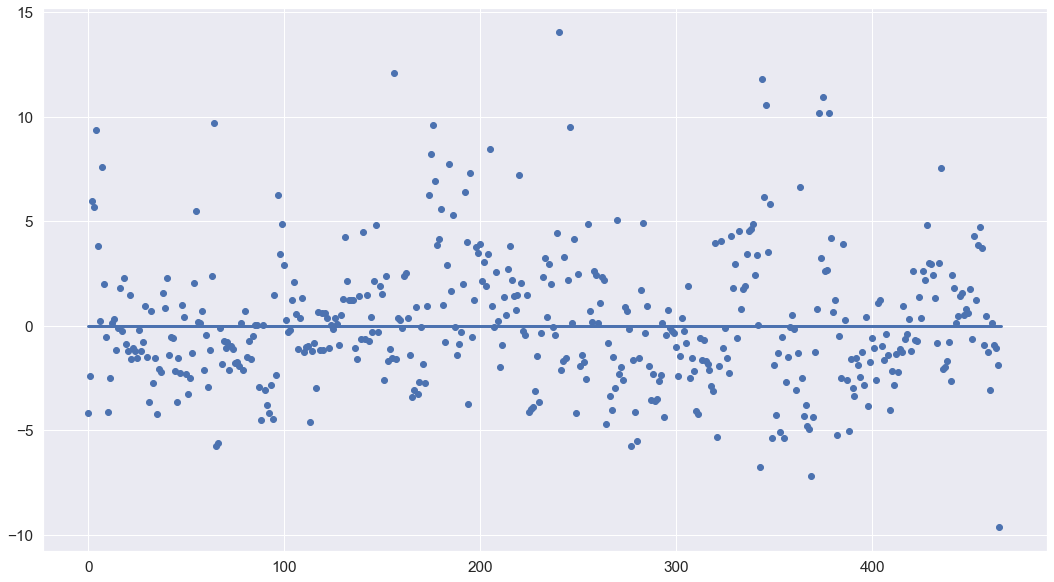

In [289]:
#распределение остатков более равномерное. Гомоскедатичность.
plt.figure(figsize=(18,10))
plt.scatter(np.arange(466), y_res_clean)
plt.plot([0, 466], [0, 0], linewidth=3)
plt.show()

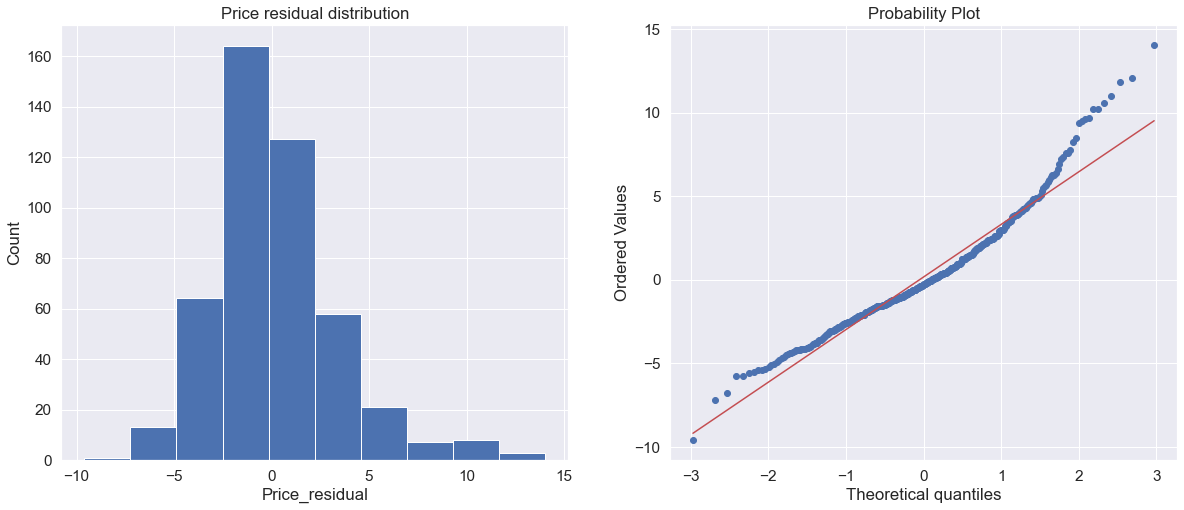

In [307]:
#проверим нормальность распределения остатков
# тоже не является нормальным, но уже лучше
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Price_residual')
ax1.set_ylabel('Count')
ax1.set_title('Price residual distribution')
pd.DataFrame(y_res_clean)[0].hist()

plt.subplot(122)
probplot(pd.DataFrame(y_res_clean)[0], dist='norm', plot=plt)

plt.show()

In [308]:
#распределение остатков также не является нормальным.
shapiro(y_res_clean)

ShapiroResult(statistic=0.9510660767555237, pvalue=2.693127144903773e-11)

### 4. Исследование модели на статистическую значимость<a class="anchor" id="course_project_review"></a>

In [291]:
#исходный датасет full_df

 F-критерий Фишера позволяет оценить значимость модели линейной   регрессии
 
1.Установим уровень значимости  α =0,05.

Число измерений n = 506, число параметров р = 13 , α = 0,05


In [292]:
#506 rows x 14 columns
# число колонок примем равным 13, так как мы не учитывали  CHAS при построении модели
full_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   

2 Находим число степеней свободы

$𝑑𝑓 1= р−1 =13−1 =12$

$𝑑𝑓2  = 𝑛− р = 506−12=494$

3 Объясненная (фактическая) сумма квадратных отклонений
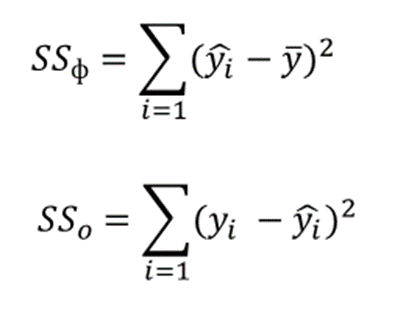

In [293]:
SS_f = np.sum((y_hat - np.mean(y)) ** 2)
SS_f

31418.540416643777

4 Рассчитываем остаточную сумму квадратных отклонений

In [294]:
SS_o = np.sum((y - y_hat) ** 2)
SS_o

11297.754935134968

5  Рассчитываем сумму квадратных отклонений в расчете на одну степень свободы

$MSф=SSф/df1$  

$MSo=SSo/df2$


In [295]:
MS_f = SS_f / 12
MS_f

2618.2117013869815

In [296]:
MS_o = SS_o / 494
MS_o

22.869949261406816

6 Рассчитываем критерий Фишера F

$Fр = MSф/ MSo$

In [297]:
F_p = MS_f / MS_o
F_p

114.48261959221878

7 При Fр > Fт подобранная модель считается значимой

$𝑑𝑓 1= р−1 =13−1 =12$

$𝑑𝑓2  = 𝑛− р = 506−12=494$

$F_t \approx 2,22$ (взяла критерий при df2 = 500, так как 494 в таблице не было, ближайшие варианты 400 и 500, разница в критерии в 1 сотую процента)

**ВЫВОД: так как 114.48261959221878 > 2,22 модель (исходный датасет full_df) считается значимой на уровне значимости 0,05!**

In [ ]:
#измененный и трансформированный через кубический корень датасет clean_df

In [309]:
clean_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   

1.Установим уровень значимости  α =0,05.

Число измерений n = 466, число параметров р = 13 , α = 0,05

2 Находим число степеней свободы

$𝑑𝑓 1= р−1 =13−1 =12$

$𝑑𝑓2  = 𝑛− р = 466−12=454$

In [310]:
SS_f = np.sum((y_hat_clean - np.mean(y_clean)) ** 2)
SS_f

15214.927312659358

In [311]:
SS_o = np.sum((y_clean - y_hat_clean) ** 2)
SS_o

4820.270900520247

In [312]:
MS_f = SS_f / 12
MS_f

1267.91060938828

In [313]:
MS_o = SS_o / 454
MS_o

10.617336785286888

In [314]:
#стал выше ,было 114.48261959221878
F_p = MS_f / MS_o
F_p

119.41889336554752

$F_t \approx 2,22$ (взяла критерий при df2 = 500, так как 454 в таблице не было, ближайшие варианты 400 и 500, разница в критерии в 1 сотую процента)

**ВЫВОД: так как 119.41889336554752 > 2,22 модель (измененный датасет clean_df) считается значимой на уровне значимости 0,05!**

### 5. Коэффициент детерминации<a class="anchor" id="course_project_review"></a>

Тесноту линейной связи оценивает коэффициент корреляции r.

Точность подобранной регрессионной модели показывает коэффициент детерминации $𝑅^2$

$𝑅^2$ показывает, какую часть изменчивости у описала регрессионная модель  

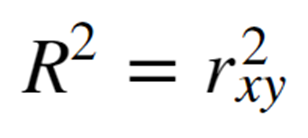

In [298]:
#коэффициент детерминации для решения по датасету full_df (где не было преобразований данных)
r_2 = np.corrcoef(y, y_hat) ** 2 
r_2[0,1]

0.7355165089722998

In [299]:
#посчитаем вручную
#ковариация
cov = np.mean(y * y_hat) - np.mean(y) * np.mean(y_hat)
cov

62.09197717048255

In [300]:
std_y = np.std(y, ddof = 0)
std_y

9.188011545278203

In [301]:
std_y_hat = np.std(y_hat, ddof = 0)
std_y_hat

7.879846261697728

In [302]:
r = cov / (std_y * std_y_hat)
r

0.8576225912208087

In [303]:
r ** 2

0.7355165089722945

**ВЫВОД: модель (исходный датасет full_df) предсказывает изменчивость данных на 73,6%**

In [315]:
#коэффициент детерминации для решения по датасету clean_df 
#(где избавлялись от выбросов и применяли трансформацию данных через кубический корень)
# стал выше, был - 0.7355165089722998
r_2 = np.corrcoef(y_clean, y_hat_clean) ** 2 
r_2[0,1]

0.7748899425631018

**ВЫВОД: модель (измененный датасет full_df) предсказывает изменчивость данных на 77,5%, что больше, чем у модели для неизменного датасета (73,6%) на 3,9%**

### 5. Дополнительно<a class="anchor" id="course_project_review"></a>

Попробуем построить модель линейной регрессии с помощью встроенной модели на Python и посмотрим на результат.

In [316]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [317]:
y = pd.DataFrame(boston["target"], columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [320]:
lr = LinearRegression()

In [321]:
lr.fit(X_train, y_train)

LinearRegression()

In [322]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [323]:
r2(y_test, y_pred) #0.7112260057484925

0.7112260057484925

### 6 Общий вывод по итогам всей работы <a class="anchor" id="course_project_review"></a>

В рамках данной курсовой работы было произедено изучение данных, первичная проверка на соответствие условиям применения линейной регрессии. 

Выбор именно этого датасета, несмотря на изначальное отстустсвие нормального распределения целевой переменной (насколько мне изестно, нормальное распределение целевой переменной дает большую вероятность нормального распределения остатков регрессии), связан именно с наличием существенной линейной связи между данным и целевой переменной (05-07 коэффициент корреляции). 

В рамках работы были простроены модели линейной регресии с применением матричного метода для измененных и предобработанных и транформированных черех кубический корень данных, также для непредобработанных данных. Также была построена модель линейной регрессии с помощью модуля LinearRegression из sklearn.linear_model. Произведена оценка знасимости с помощью  F-критерия Фишера (обе модели значимы при альфа 5%), а также расчет коэфициента детерминации. Максимальный коэфициент детерминации получился у модели для предобработанных и трансформированных данных - 0.7748899425631018, у построенной мной модели - 0.7355165089722998, у модели модуля LinearRegression - 0.7112260057484925. На мой взгляд, это еще раз говорит о том, что важно предобрабатывать данные и трансформировать их.

Важно отметить, что несмотря на отсутствие нормального распределения остатков, предсказания модели получились вцелом успешные. На мой вгляд, это говорит о том, что сильная линейная связь является более важным критерием для построения линейной регрессии и линейная регрессия вцелом устойчива к отсутствию нормального распределения остатков. 
